# Project 2: Ames Housing Saleprice Prediction
---

Project notebook organisation:<br>
**[1 - Data Cleaning]** (current notebook)<br>
[2 - Exploratory Data Analysis and Feature Engineering](./2_eda.ipynb)<br>
[3 - Modelling and insights](./3_modelling_and_insights.ipynb)<br><br>
<br>
<br>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Introduction and Problem statement

This project examines a comprehensive housing dataset from the city of Ames in Iowa, USA. The model, and our understanding of the key features will be beneficial to existing home owners who might be considering selling their property to have a gauge of what prices their property could fetch. Also, people looking to buy houses want to get the best house possible given a budget. The goal of this project is hence to develop a predictive model that will be able to predict the house prices in Ames, Iowa.

**Problem statement:** Given a set of house features, what is the expected sale price of a house?

To answer this question, I fitted four different linear regression models to the housing data provided on Kaggle. The performance of the models is evaluated using the R2 metric, which is a measure of how much the model is able to explain the variance in the dataset, and the root mean square error (RMSE) metric, which is a measure the variance, or spread of the data.

Due to the scale of this project, it is split into three Jupyter notebooks: data cleaning, exploratory data analysis and feature engineering, and modelling and insights. This is the data cleaning notebook.

## Executive Summary

An elastic net regression model and a ridge regression model had the best predictive performance and outperformed the other linear models tested. The four results of the different models I conducted are summarised in the following table:

| Regressor   | Metric | Score (Training data) [k = 5] | Score (Test Data) |
|-------------|--------|-------------------------------|-------------------|
| Linear      | RMSE   | 1.62                          | 3.24              |
| Linear      | R^2    | -1.00 e+23                    | -1.56 e+23        |
| Lasso       | RMSE   | 49860.73                      | 37591.37          |
| Lasso       | R^2    | 0.45                          | 0.79              |
| Ridge       | RMSE   | 31609.04                      | 34088.88          |
| Ridge       | R^2    | 0.80                          | 0.83              |
| Elastic Net | RMSE   | 34883.53                      | 31814.26          |
| Elastic Net | R^2    | 0.79                          | 0.84              |

For both training and test data, the **elastic net model** and the **ridge regression** model performed the best and had the highest $R^2$ with minimal variation between training and test data, indicating an absence of overfitting. This means that the models are able to explain 86% of the variations of the training data. The RMSE of around 32,000 means that our best linear prediction of the sale price based on all of the attributes is off by around \$ 32,000 on average. We find a similar error when predicting prices on the test set, which indicates that our prediction method will generalize to other samples from the same population.

People looking to buy houses would be able to use the model to see if their prospective purchases was going to be value for money given the listed features in an advertisement. Features such as square feet area, condition, age, and the location of the house are the most important determinant factors of how much a house is priced.
Buyers with limited or specific budgets will be able to find out what features they would be able to afford, e.g. how big a house they can buy in Northridge with a $ 50,000 budget. 
The model also allows buyers to identify the 'expensive' neighbourhoods such as Northridge Heights, Stone Brook, and Northridge. It also indicates areas where houses should be avoided, such as areas gazetted as commercial zones.

However, certain limmitations to the model must be noted. As the model was developed using data on houses sold between 2006 - 2010 in Ames, USA, it may have limited applicability. Firstly, it captures only a small time frame of four years which is not enough to capture any annual patterns in sale price that could arise as a result of external factors, such as policy changes and the current economy. It is also unknown whether or not the sale prices had been adjusted for inflation within those years, which would have been a source of variation in saleprice otherwise. 
It would also be inaccurate to generalise it to 2020 as house prices may have changed due to one or more of these factors or even with Covid-19. 

There may also be other factors affecting house price, since the model only accounted for 83-84 \% of the variation in sale price. The remaining 16-17\% could be due to the fact that the model is apparently not very accurate when it comes to larger and more expensive houses exceeding 400,000 in price, likely because of outliers.

It must also be noted that the model is specific to Ames and may not be as accurate when applied to data from another city or country. Variations in cultures mean people in different countries look for different things in a house, which would in turn affect sale price. For example, having a fireplace in a house in Singapore is unlikely to bring the value of the house up. To make the model more universal, data should be extracted from a sample of the entire world or even just a region so that distributions form a bell curve. This would allow us to generalise our findings to different regions other than Ames.


# Workbook 1: Data-cleaning

## Contents of this workbook

1. [Functions used](#Functions-used)
1. [Initial analysis for training set](#Initial-analysis-for-training-set)
2. [Understanding null values](#Understanding-null-values)
  1. [Analysing numerical columns](#Analysing-numerical-columns)
  1. [Analysing categorical columns](#Analysing-categorical-columns)
1. [Summary of null values](#Summary-of-null-values)
1. [Investigate and resolve low nullcounts](#Investigate-and-resolve-low-nullcounts)
1. [Investigate and resolve high nullcounts](#Investigate-and-resolve-high-nullcounts)
1. [Confirmation of processed test data](#Confirmation-of-processed-test-data)
1. [Initial analysis for test set](#Initial-analysis-for-test-set)
1. [Investigate and resolve nullcounts](#Investigate-and-resolve-nullcounts)
1. [Confirmation of processed train data](#Confirmation-of-processed-train-data)
1. [Summary of data cleaning](#Summary-of-data-cleaning)

## Functions used

In [2]:
#This function returns a report of the number of null values in their respective columns. It also gives a visualisation
#of where these null values are in a heatmap.

def nullreport(df):
    df_nullcount = pd.DataFrame(df.isnull().sum(), columns = ['nulls'])
    df_nullcount = df_nullcount[df_nullcount['nulls'] != 0]
    plt.figure(figsize=(13,9))
    sns.heatmap(df.isnull())
    print(df_nullcount.shape)
    return df_nullcount

## Initial analysis for training set
---

In [3]:
# Import and read the CSV. Assign test.csv to variable ames_test and train.csv to ames_train

ames_train = pd.read_csv("./datasets/train.csv")
ames_test = pd.read_csv("./datasets/test.csv")

#Make all columns lowercase and replace spaces with '_'
ames_train.columns = ames_train.columns.str.lower()
ames_train.columns = ames_train.columns.str.replace(' ', '_')

In [4]:
ames_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
ames_train.shape

(2051, 81)

In [6]:
# Check for repeated values in the 'id and ;pid; field
print(f"The id field has {ames_train['id'].nunique() - ames_train.shape[0]} repeated values")
print(f"The pid field has {ames_train['pid'].nunique() - ames_train.shape[0]} repeated values")

The id field has 0 repeated values
The pid field has 0 repeated values


In [7]:
ames_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
pid,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
ms_subclass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
lot_frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
lot_area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
overall_qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
overall_cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
year_built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
year_remod/add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
mas_vnr_area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [8]:
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

Dataset has 2051 rows and 80 columns

* The dataset contains 2051 entries with 81 features, representing characteristics of houses sold between 2006-2010. 
* There are no repeat vaues in the `id` and `pid` columns
* The data is split into different categories:
    * ID
    * Numerical
    * Categorical
    * Categorical (Ordinal)
* The highest selling price is \\$611,657 and the lowest is \\$12,789

## Understanding null values 
---

(26, 1)


,nulls
lot_frontage,330
alley,1911
mas_vnr_type,22
mas_vnr_area,22
bsmt_qual,55
bsmt_cond,55
bsmt_exposure,58
bsmtfin_type_1,55
bsmtfin_sf_1,1
bsmtfin_type_2,56


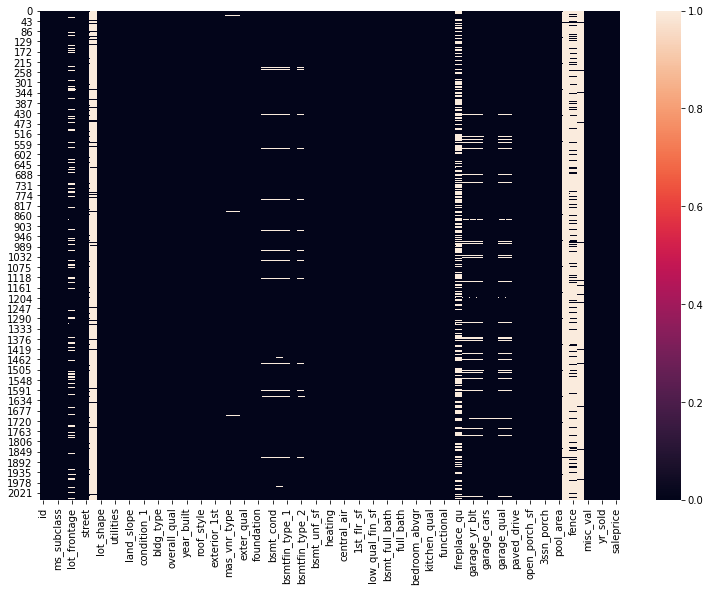

In [9]:
nullreport(ames_train)

26 out of 81 columns appear to have null values with differing severity. Due to the mixed nature of the dataset, I next analysie categorical and numerical columns separately.

### Analysing numerical columns

In [10]:
# Isolate columns with numerical information 
# solution sourced from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html
num_cols = ames_train.select_dtypes(exclude=['object'])
num_cols

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,...,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,59,0,0,0,0,0,3,2010,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,79.0,11449,8,5,2007,2007,0.0,...,0,276,0,0,0,0,0,1,2008,298751
2047,785,905377130,30,NaN,12342,4,5,1940,1950,0.0,...,158,0,0,0,0,0,0,3,2009,82500
2048,916,909253010,50,57.0,7558,6,6,1928,1950,0.0,...,0,0,0,0,0,0,0,3,2009,177000
2049,639,535179160,20,80.0,10400,4,5,1956,1956,0.0,...,0,189,140,0,0,0,0,11,2009,144000


(11, 1)


,nulls
lot_frontage,330
mas_vnr_area,22
bsmtfin_sf_1,1
bsmtfin_sf_2,1
bsmt_unf_sf,1
total_bsmt_sf,1
bsmt_full_bath,2
bsmt_half_bath,2
garage_yr_blt,114
garage_cars,1


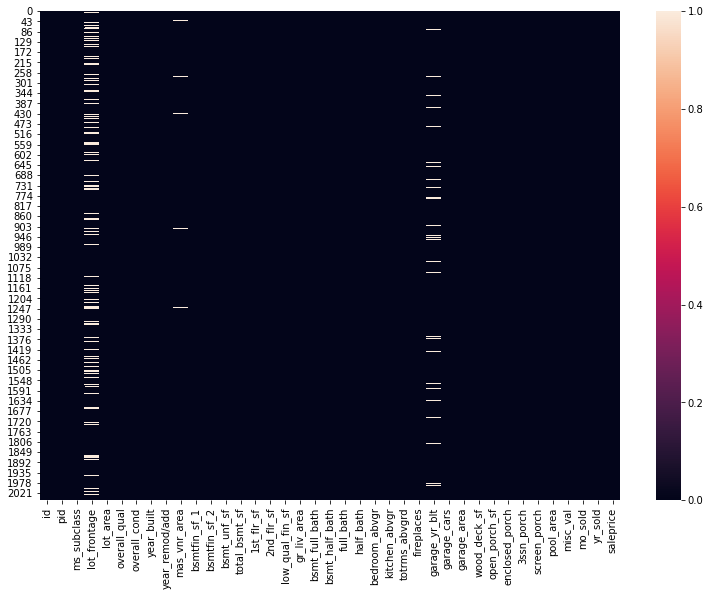

In [11]:
nullreport(num_cols)

### Analysing categorical columns
---

In [12]:
# Isolate columns with information as object information 
# solution sourced from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html
cat_cols = ames_train.select_dtypes(include=['object'])

cat_cols

,ms_zoning,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,...,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,sale_type
0,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,NaN,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,NaN,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,...,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD
2047,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
2048,RL,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,...,TA,Detchd,Unf,Fa,Fa,Y,NaN,NaN,NaN,WD
2049,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD


(15, 1)


,nulls
alley,1911
mas_vnr_type,22
bsmt_qual,55
bsmt_cond,55
bsmt_exposure,58
bsmtfin_type_1,55
bsmtfin_type_2,56
fireplace_qu,1000
garage_type,113
garage_finish,114


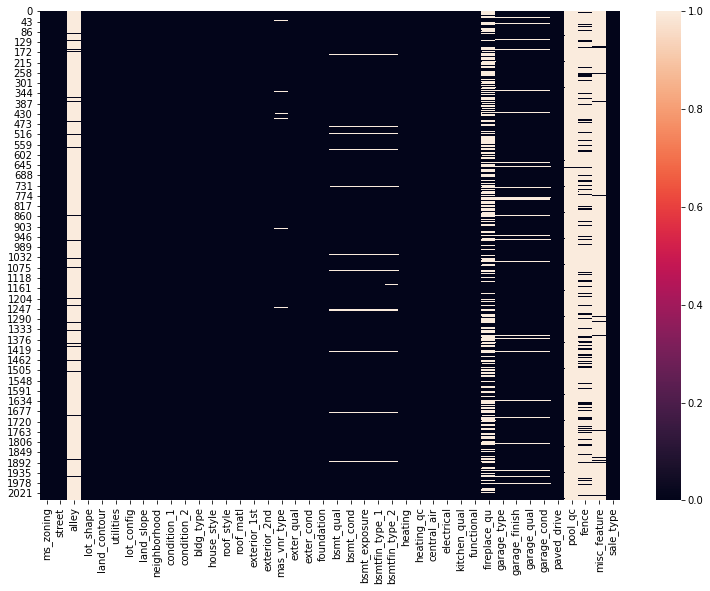

In [13]:
nullreport(cat_cols)

In [14]:
cat_cols.dtypes

ms_zoning         object
street            object
alley             object
lot_shape         object
land_contour      object
utilities         object
lot_config        object
land_slope        object
neighborhood      object
condition_1       object
condition_2       object
bldg_type         object
house_style       object
roof_style        object
roof_matl         object
exterior_1st      object
exterior_2nd      object
mas_vnr_type      object
exter_qual        object
exter_cond        object
foundation        object
bsmt_qual         object
bsmt_cond         object
bsmt_exposure     object
bsmtfin_type_1    object
bsmtfin_type_2    object
heating           object
heating_qc        object
central_air       object
electrical        object
kitchen_qual      object
functional        object
fireplace_qu      object
garage_type       object
garage_finish     object
garage_qual       object
garage_cond       object
paved_drive       object
pool_qc           object
fence             object


## Summary of null values
---

There are 26 columns with varying amounts of null values, ranging from 1 to 2042. 

For numerical columns, only 3 columns have significant missing values.

For categorical columns there are 15 columns with significant (>55) null columns.

Looking at the categorical columns and comparing their unique values with the [data dictionary](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data), it is likely that the null values represent houses without those features, e.g. without a garage, pool, or fireplace. 

The missing values in some numerical columns correspond to those as well, e.g. houses without masonry veneer also have null values for mas_vnr_area and mas_vnr_type. 

The nulls in these categorical columns will be filled with "None", and those in numerical columns will be filled with 0.

Some columns only have 1 or 2 null values, these are likely errors in recording and will be dropped.


(26, 1)


,nulls
lot_frontage,330
alley,1911
mas_vnr_type,22
mas_vnr_area,22
bsmt_qual,55
bsmt_cond,55
bsmt_exposure,58
bsmtfin_type_1,55
bsmtfin_sf_1,1
bsmtfin_type_2,56


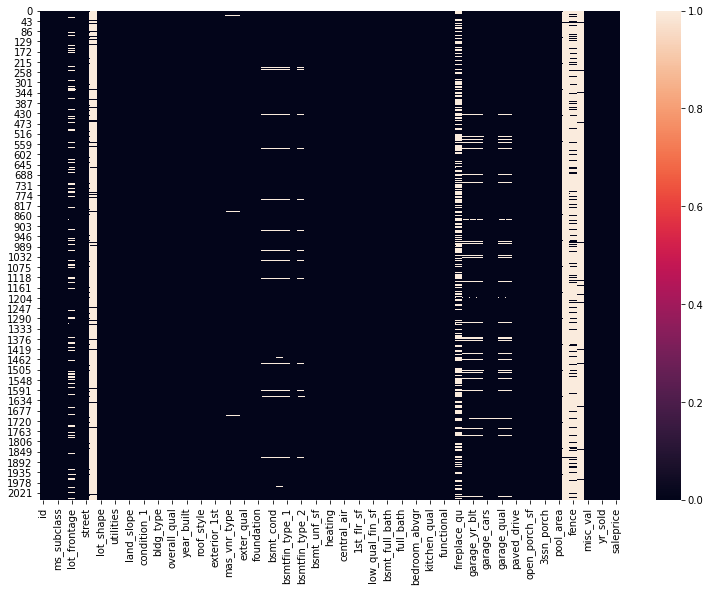

In [15]:
nullreport(ames_train)

## Investigate and resolve low nullcounts

The main hypothesis for variables with low null counts such as 'bsmtfin_sf_1' is that there are errors in recording and should be dropped. 

I investigate this hypothesis by calling all the rows with low null counts and looking of overlaps in rows.

In [16]:
ames_train.loc[ames_train['bsmtfin_sf_1'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [17]:
ames_train.loc[ames_train['bsmtfin_sf_2'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [18]:
ames_train.loc[ames_train['bsmt_unf_sf'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [19]:
ames_train.loc[ames_train['total_bsmt_sf'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [20]:
ames_train.loc[ames_train['bsmt_full_bath'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [21]:
ames_train.loc[ames_train['bsmt_half_bath'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [22]:
ames_train.loc[ames_train['garage_cars'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [23]:
ames_train.loc[ames_train['garage_area'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


Rows that stand out:
    * 1327
    * 616
    * 1712
    
These rows consistently display missing information overlapping with each other and should be dropped.

In [24]:
ames_train.drop([1327, 616, 1712], inplace = True)

(18, 1)


,nulls
lot_frontage,330
alley,1908
mas_vnr_type,22
mas_vnr_area,22
bsmt_qual,53
bsmt_cond,53
bsmt_exposure,56
bsmtfin_type_1,53
bsmtfin_type_2,54
fireplace_qu,998


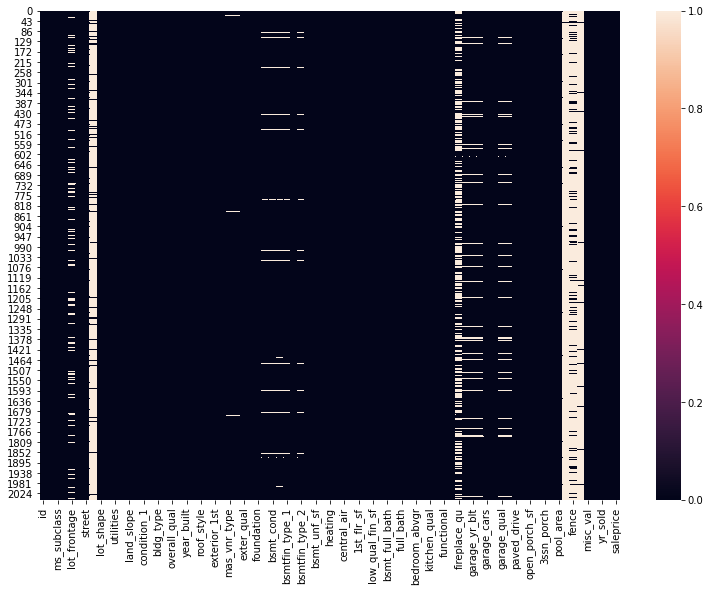

In [25]:
# Runn nullreport() again to make sure we have cleaned the appropriate data

nullreport(ames_train)

We now have 18 more features to clean.

The remaining features appear to have a few different themes:
 * Basements
 * Frontage
 * Alley
 * Masonry Veneer
 * Fireplace
 * Garage
 * Pool
 * Fence
 * Misc Features
 
Features that are close to their respective themes have the equivalent number of null values. 

I posit that the null values explain the absense of these features. An appropriate action would be to replace these values with either 'none' or '0'.

## Investigate and resolve high nullcounts

### Mas_vnr features

In [26]:
#Selecting the columns with null values and assigning them to the variable mas_vnr for data cleaning
# Nan values seem to indicate the absence of mas_vnr. I shall replace NaN in Mass_vnr_typr with 'none'
# and mas_vnr_area with 0.0
mas_vnr = ames_train.loc[ames_train['mas_vnr_area'].isnull()][['mas_vnr_type','mas_vnr_area']]
print(mas_vnr.shape)
mas_vnr

(22, 2)


,mas_vnr_type,mas_vnr_area
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN
338,NaN,NaN
431,NaN,NaN
451,NaN,NaN
591,NaN,NaN
844,NaN,NaN


In [27]:
ames_train['mas_vnr_type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

In [28]:
ames_train['mas_vnr_type'] = ames_train['mas_vnr_type'].fillna('none')

ames_train['mas_vnr_area'] = ames_train['mas_vnr_area'].fillna(0.0)

### Basement features

In [29]:
# entries 1456, 1547, 1997 appear to have basements even though BsmtExposure is a NaN value. The description seems to fit an
#unfinished basement which is relatively high. for these three rows, I will fill bsmnt_exposure = 'No'
#The other values will be filled with 'None'

bsmt = ames_train.loc[ames_train['bsmt_exposure'].isnull()][['bsmt_exposure','bsmt_cond', 'bsmt_qual','bsmtfin_type_1','bsmtfin_type_2']]
bsmt

,bsmt_exposure,bsmt_cond,bsmt_qual,bsmtfin_type_1,bsmtfin_type_2
12,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN
240,NaN,NaN,NaN,NaN,NaN
249,NaN,NaN,NaN,NaN,NaN
256,NaN,NaN,NaN,NaN,NaN
390,NaN,NaN,NaN,NaN,NaN
437,NaN,NaN,NaN,NaN,NaN


In [30]:
ames_train['bsmt_exposure'].unique()

array(['No', 'Gd', 'Av', nan, 'Mn'], dtype=object)

In [31]:
ames_train['bsmtfin_type_1'].unique()

array(['GLQ', 'Unf', 'ALQ', 'Rec', nan, 'BLQ', 'LwQ'], dtype=object)

In [32]:
ames_train['bsmtfin_type_2'].unique()

array(['Unf', 'Rec', nan, 'BLQ', 'GLQ', 'LwQ', 'ALQ'], dtype=object)

In [33]:
ames_train['bsmt_qual'].unique()

array(['TA', 'Gd', 'Fa', nan, 'Ex', 'Po'], dtype=object)

In [34]:
ames_train['bsmt_cond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po', 'Ex'], dtype=object)

In [35]:
ames_train['bsmt_exposure'].unique()

array(['No', 'Gd', 'Av', nan, 'Mn'], dtype=object)

In [36]:
ames_train.at[1997, 'bsmt_exposure'] = 'No'
ames_train.at[1456, 'bsmt_exposure'] = 'No'
ames_train.at[1547, 'bsmt_exposure'] = 'No'

In [37]:
ames_train['bsmt_exposure'] = ames_train['bsmt_exposure'].fillna('none')
ames_train['bsmt_cond'] = ames_train['bsmt_cond'].fillna('none')
ames_train['bsmt_qual'] = ames_train['bsmt_qual'].fillna('none')
ames_train['bsmtfin_type_1'] = ames_train['bsmtfin_type_1'].fillna('none')
ames_train['bsmtfin_type_2'] = ames_train['bsmtfin_type_2'].fillna('none')


### Alley feature

In [38]:
#The alley feature seems to indicate that the presence of NaN means there is no alley. I shall replace this with 'none'
alley = ames_train.loc[ames_train['alley'].isnull()][['alley']]
alley

,alley
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2046,NaN
2047,NaN
2048,NaN
2049,NaN


In [39]:
ames_train['alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [40]:
ames_train['alley'] = ames_train['alley'].fillna('none')

### Lot frontage feature

In [41]:
#The frontage feature seems to indicate that the Na values mean there is no street connected to the property. 
# However, multiple entries have Na values. despite being classed as properties with single story or 2 story.

# I posit that these are entry errors and these calues must be imputed

# Default value of display.max_rows is 10 i.e. at max 10 rows will be printed.
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)


frontage = ames_train.loc[ames_train['lot_frontage'].isnull()][['lot_frontage', 'street','ms_subclass', 'lot_area', 'neighborhood']]
frontage.head()

,lot_frontage,street,ms_subclass,lot_area,neighborhood
0,NaN,Pave,60,13517,Sawyer
7,NaN,Pave,20,12160,NAmes
8,NaN,Pave,20,15783,OldTown
23,NaN,Pave,20,7980,Gilbert
27,NaN,Pave,50,11700,Crawfor


In [42]:
# LOT FRONTAGE
# fill nan with neighbourhood median
median_lotfrt_per_nbhood = ames_train["lot_frontage"].groupby(ames_train["neighborhood"])
for nbhood, grouped in median_lotfrt_per_nbhood:
    index = (ames_train['neighborhood'] == nbhood) & (ames_train['lot_frontage'].isnull())
    ames_train.loc[index,'lot_frontage'] = grouped.median()


# Three rows remain from the neighborhoods without a median (i.e. n < 3, there are fewer than 3 entries per neighborhood),
# I will fill these with the overall lotfrontage median
ames_train['lot_frontage'] = ames_train['lot_frontage'].fillna(ames_train['lot_frontage'].median())

In [43]:
# Check if all NA values have been filled
frontage = ames_train.loc[ames_train['lot_frontage'].isnull()][['lot_frontage', 'street','ms_subclass', 'lot_area', 'neighborhood']]
frontage.head()

,lot_frontage,street,ms_subclass,lot_area,neighborhood


### Fireplace feature

In [44]:
#according to the data dictionary, a nan value means there is no fioreplace. I shall replace it with None. 
fireplace = ames_train.loc[ames_train['fireplace_qu'].isnull()][['fireplace_qu']]

In [45]:
ames_train['fireplace_qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [46]:
ames_train['fireplace_qu'] = ames_train['fireplace_qu'].fillna('none')

### Garage features


In [47]:
# Exactly 113 entrees for garage-related features have come up. 
#It is likely these places do not have a garage. 
# For 'garage_yr_built', I shall replace nan values with 0.0. For the rest,
#I shall replace Nan with 'none'.

garage = ames_train.loc[ames_train['garage_type'].isnull()][['garage_yr_blt','garage_finish', 'garage_qual','garage_cond','garage_type']]
garage

,garage_yr_blt,garage_finish,garage_qual,garage_cond,garage_type
28,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN
136,NaN,NaN,NaN,NaN,NaN


In [48]:
garage.columns

Index(['garage_yr_blt', 'garage_finish', 'garage_qual', 'garage_cond',
       'garage_type'],
      dtype='object')

In [49]:
ames_train['garage_yr_blt'] = ames_train['garage_yr_blt'].fillna(0)

In [50]:
# Using .update makes the code more efficient
ames_train.update(ames_train[['garage_type', 'garage_yr_blt', 'garage_finish', 'garage_qual', 'garage_cond']].fillna('none'))

### Pool feature

In [51]:
# Nan would likely mean there is no pool. THis is reinforced by the 0s in pool_area. I shall replace these with 'none'
pool = ames_train.loc[ames_train['pool_qc'].isnull()][['pool_qc', 'pool_area']]
pool

,pool_qc,pool_area
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
5,NaN,0
6,NaN,0
7,NaN,0
8,NaN,0
9,NaN,0


In [52]:
ames_train['pool_qc'] = ames_train['pool_qc'].fillna('none')

### Fence feature

In [53]:
# A nan value means there is no fence. I shall replace this with 'none'
ames_train.loc[ames_train['fence'].isnull()][['fence']]

,fence
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
9,NaN
10,NaN
11,NaN


In [54]:
ames_train['fence'] = ames_train['fence'].fillna('none')

### misc_feature feature

In [55]:
# Nan values indicate absence of Misc features. in shall replace this with None
ames_train.loc[ames_train['misc_feature'].isnull()][['misc_feature']]

,misc_feature
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
9,NaN
10,NaN


In [56]:
ames_train['misc_feature'].unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [57]:
ames_train['misc_feature'] = ames_train['misc_feature'].fillna('none')

## Confirmation of processed test data

(0, 1)


,nulls


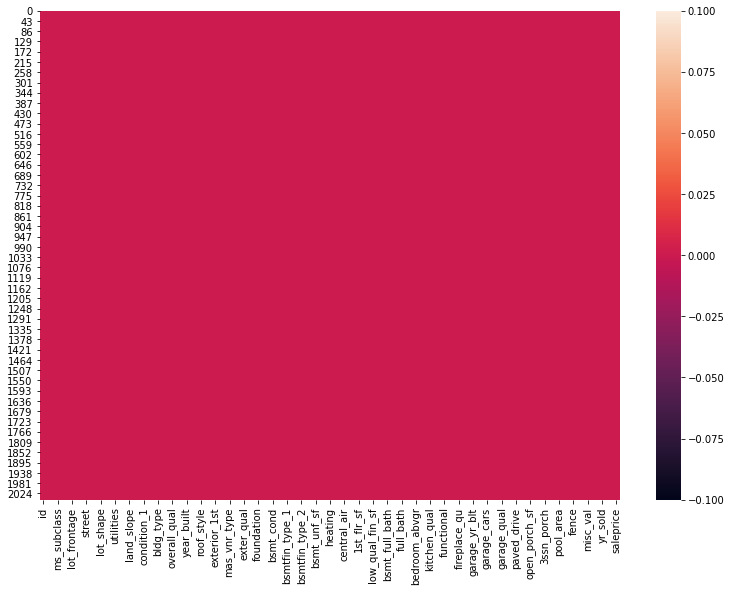

In [58]:
# Run nullreport() to ensure there are no more null values

nullreport(ames_train)

In [59]:
#Using a .applymap function, turn all strings into lowercase and all ints into floats
ames_train = ames_train.applymap(lambda s:s.lower() if type(s) == str else float(s))

In [60]:
ames_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109.0,533352170.0,60.0,rl,70.0,13517.0,pave,none,ir1,lvl,...,0.0,0.0,none,none,none,0.0,3.0,2010.0,wd,130500.0
1,544.0,531379050.0,60.0,rl,43.0,11492.0,pave,none,ir1,lvl,...,0.0,0.0,none,none,none,0.0,4.0,2009.0,wd,220000.0
2,153.0,535304180.0,20.0,rl,68.0,7922.0,pave,none,reg,lvl,...,0.0,0.0,none,none,none,0.0,1.0,2010.0,wd,109000.0
3,318.0,916386060.0,60.0,rl,73.0,9802.0,pave,none,reg,lvl,...,0.0,0.0,none,none,none,0.0,4.0,2010.0,wd,174000.0
4,255.0,906425045.0,50.0,rl,82.0,14235.0,pave,none,ir1,lvl,...,0.0,0.0,none,none,none,0.0,3.0,2010.0,wd,138500.0


In [61]:
#Confirm that there are only objects and floats in the df.
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2048 non-null   float64
 1   pid              2048 non-null   float64
 2   ms_subclass      2048 non-null   float64
 3   ms_zoning        2048 non-null   object 
 4   lot_frontage     2048 non-null   float64
 5   lot_area         2048 non-null   float64
 6   street           2048 non-null   object 
 7   alley            2048 non-null   object 
 8   lot_shape        2048 non-null   object 
 9   land_contour     2048 non-null   object 
 10  utilities        2048 non-null   object 
 11  lot_config       2048 non-null   object 
 12  land_slope       2048 non-null   object 
 13  neighborhood     2048 non-null   object 
 14  condition_1      2048 non-null   object 
 15  condition_2      2048 non-null   object 
 16  bldg_type        2048 non-null   object 
 17  house_style   

In [62]:
# save processed data as 'train_cleaned.csv'
ames_train.to_csv('./datasets/train_cleaned.csv')

# Initial analysis for test set

---

In [63]:
#Make all columns lowercase and replace spaces with '_'
ames_test.columns = ames_test.columns.str.lower()
ames_test.columns = ames_test.columns.str.replace(' ', '_')

In [64]:
ames_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [65]:
ames_test.shape

(879, 80)

In [66]:
ames_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               879 non-null    int64  
 1   pid              879 non-null    int64  
 2   ms_subclass      879 non-null    int64  
 3   ms_zoning        879 non-null    object 
 4   lot_frontage     719 non-null    float64
 5   lot_area         879 non-null    int64  
 6   street           879 non-null    object 
 7   alley            58 non-null     object 
 8   lot_shape        879 non-null    object 
 9   land_contour     879 non-null    object 
 10  utilities        879 non-null    object 
 11  lot_config       879 non-null    object 
 12  land_slope       879 non-null    object 
 13  neighborhood     879 non-null    object 
 14  condition_1      879 non-null    object 
 15  condition_2      879 non-null    object 
 16  bldg_type        879 non-null    object 
 17  house_style     

(19, 1)


,nulls
lot_frontage,160
alley,821
mas_vnr_type,1
mas_vnr_area,1
bsmt_qual,25
bsmt_cond,25
bsmt_exposure,25
bsmtfin_type_1,25
bsmtfin_type_2,25
electrical,1


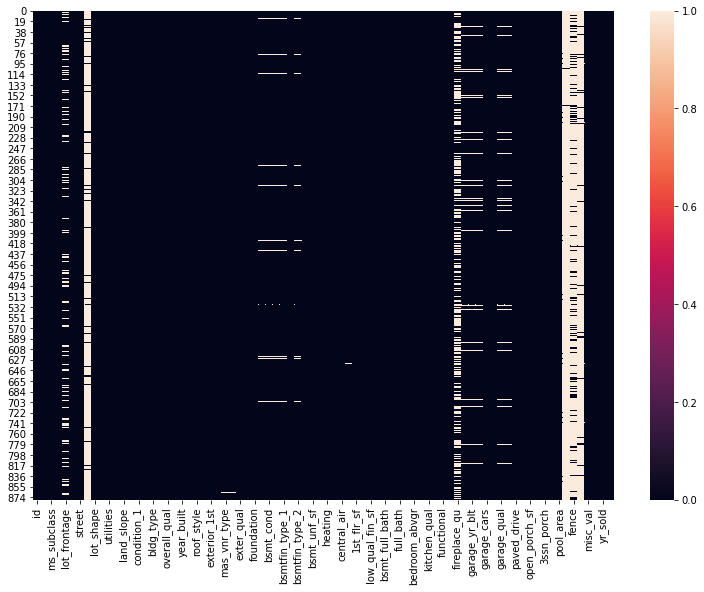

In [67]:
# Run nullreport() for ames_test

nullreport(ames_test)

The list of nulls appear to be similar to the test set except for the 'Electrical feature which should be investigated further

## Investigate and resolve nullcounts
---

### Electrical Feature

In [68]:
# This appears to be an entry error as the 'utilities' section describes the house as having electricity, gas, water and sewage
ames_test.loc[ames_test['electrical'].isnull()][['electrical', 'utilities']]

,electrical,utilities
635,NaN,AllPub


In [69]:
ames_test[['electrical', 'utilities']]

,electrical,utilities
0,FuseP,AllPub
1,SBrkr,AllPub
2,SBrkr,AllPub
3,SBrkr,AllPub
4,SBrkr,AllPub
5,SBrkr,AllPub
6,SBrkr,AllPub
7,SBrkr,AllPub
8,SBrkr,AllPub
9,SBrkr,AllPub


In [70]:
# Only 1 entry does not have all public utilities. Even then, there os a Fuse system availableele
ames_test.loc[ames_test['utilities'] != 'AllPub'][['electrical', 'utilities']]

,electrical,utilities
144,FuseA,NoSewr


In [71]:
# Only 65 out of 859 entries still utilise a system of wired fuses. I posit that the missing 'electrical'
#feature is likely to be a 'SBrkr' and I will place it as such
ames_test.loc[ames_test['electrical'] != 'SBrkr'][['electrical', 'utilities']]

,electrical,utilities
0,FuseP,AllPub
17,FuseA,AllPub
27,FuseA,AllPub
29,FuseA,AllPub
31,FuseA,AllPub
37,FuseA,AllPub
50,FuseA,AllPub
97,FuseA,AllPub
105,FuseA,AllPub
142,FuseA,AllPub


In [72]:
ames_test.at[635, 'electrical'] = 'SBrkr'

(18, 1)


,nulls
lot_frontage,160
alley,821
mas_vnr_type,1
mas_vnr_area,1
bsmt_qual,25
bsmt_cond,25
bsmt_exposure,25
bsmtfin_type_1,25
bsmtfin_type_2,25
fireplace_qu,422


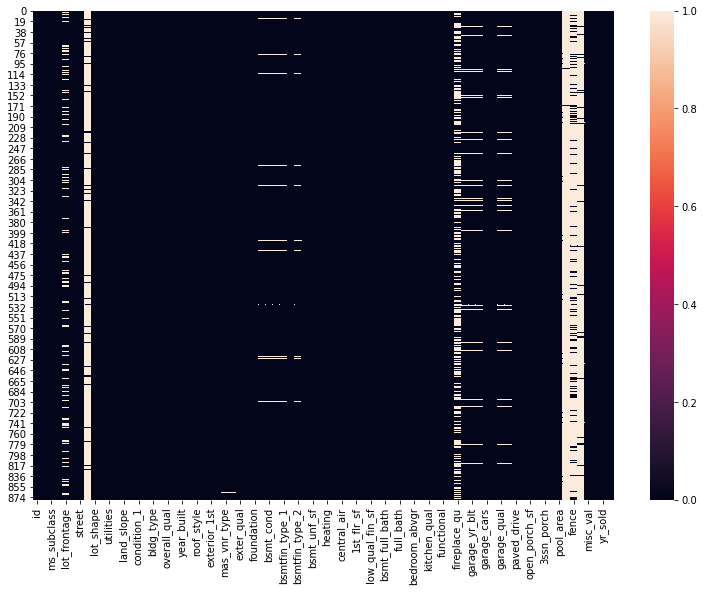

In [73]:
# Print a list of nulls for columns containing nulls

nullreport(ames_test)

### Resolution of other features

In [74]:
# As with the train set Nan values seem to indicate the absence of mas_vnr. I shall replace NaN in Mass_vnr_typr with 'none'
# and mas_vnr_area with 0.0
mas_vnr = ames_test.loc[ames_test['mas_vnr_area'].isnull()][['mas_vnr_type','mas_vnr_area']]
print(mas_vnr.shape)
mas_vnr

(1, 2)


,mas_vnr_type,mas_vnr_area
866,NaN,NaN


In [75]:
# Resolve Mas_vnr features
ames_test['mas_vnr_type'] = ames_test['mas_vnr_type'].fillna('none')
ames_test['mas_vnr_area'] = ames_test['mas_vnr_area'].fillna(0.0)

In [76]:
#Resolve lot frontage feature

# fill nan with neighbourhood median
median_lotfrt_per_nbhood = ames_test["lot_frontage"].groupby(ames_test["neighborhood"])
for nbhood, grouped in median_lotfrt_per_nbhood:
    index = (ames_test['neighborhood'] == nbhood) & (ames_test['lot_frontage'].isnull())
    ames_test.loc[index,'lot_frontage'] = grouped.median()
# FOr neighborhoods without a median (i.e. n < 3, there are fewer than 3 entries per neighborhood),
# I will fill these with the overall lotfrontage median
ames_test['lot_frontage'] = ames_test['lot_frontage'].fillna(ames_test['lot_frontage'].median())

#Resolve alley and frontage features
ames_test['alley'] = ames_test['alley'].fillna('none')

#resolve basement features
ames_test.update(ames_test[['bsmt_exposure', 'bsmt_cond', 'bsmt_qual', 'bsmtfin_type_1', 'bsmtfin_type_2']].fillna('none'))

#resolve fireplace features
ames_test['fireplace_qu'] = ames_test['fireplace_qu'].fillna('none')

#resolve garage feature
ames_test['garage_yr_blt'] = ames_test['garage_yr_blt'].fillna(0)
ames_test.update(ames_test[['garage_type', 'garage_finish', 'garage_qual', 'garage_cond']].fillna('none'))

#resolve misc features
ames_test['misc_feature'] = ames_test['misc_feature'].fillna('none')

#resolve pool features
ames_test['pool_qc'] = ames_test['pool_qc'].fillna('none')

#resolve pool features
ames_test['fence'] = ames_test['fence'].fillna('none')

## Confirmation of processed train data

(0, 1)


,nulls


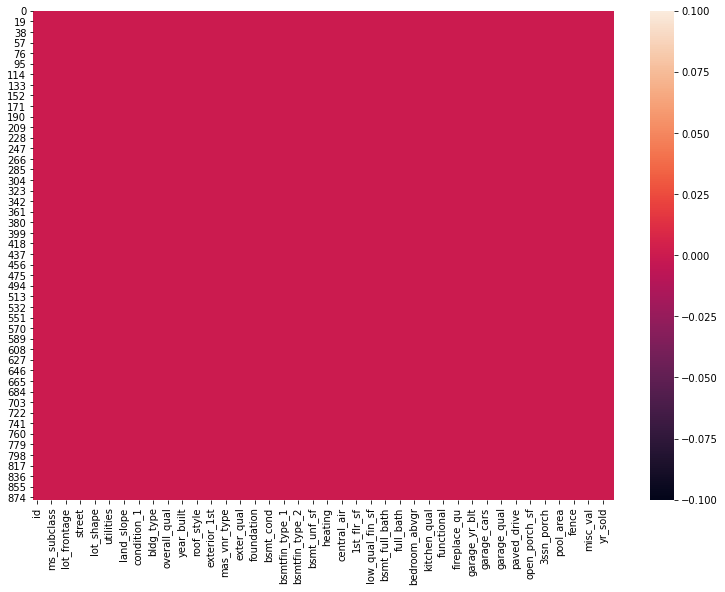

In [77]:
nullreport(ames_test)

In [78]:
#Using a .applymap function, turn all strings into lowercase and all ints into floats
ames_test = ames_test.applymap(lambda s:s.lower() if type(s) == str else float(s))

In [79]:
ames_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658.0,902301120.0,190.0,rm,69.0,9142.0,pave,grvl,reg,lvl,...,0.0,0.0,0.0,none,none,none,0.0,4.0,2006.0,wd
1,2718.0,905108090.0,90.0,rl,75.0,9662.0,pave,none,ir1,lvl,...,0.0,0.0,0.0,none,none,none,0.0,8.0,2006.0,wd
2,2414.0,528218130.0,60.0,rl,58.0,17104.0,pave,none,ir1,lvl,...,0.0,0.0,0.0,none,none,none,0.0,9.0,2006.0,new
3,1989.0,902207150.0,30.0,rm,60.0,8520.0,pave,none,reg,lvl,...,0.0,0.0,0.0,none,none,none,0.0,7.0,2007.0,wd
4,625.0,535105100.0,20.0,rl,74.5,9500.0,pave,none,ir1,lvl,...,0.0,185.0,0.0,none,none,none,0.0,7.0,2009.0,wd


In [80]:
ames_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               879 non-null    float64
 1   pid              879 non-null    float64
 2   ms_subclass      879 non-null    float64
 3   ms_zoning        879 non-null    object 
 4   lot_frontage     879 non-null    float64
 5   lot_area         879 non-null    float64
 6   street           879 non-null    object 
 7   alley            879 non-null    object 
 8   lot_shape        879 non-null    object 
 9   land_contour     879 non-null    object 
 10  utilities        879 non-null    object 
 11  lot_config       879 non-null    object 
 12  land_slope       879 non-null    object 
 13  neighborhood     879 non-null    object 
 14  condition_1      879 non-null    object 
 15  condition_2      879 non-null    object 
 16  bldg_type        879 non-null    object 
 17  house_style     

In [81]:
# Check for repeated values in the 'id' and 'pid' field
print(f"The id field has {ames_test['id'].nunique() - ames_test.shape[0]} repeated values")
print(f"The pid field has {ames_test['pid'].nunique() - ames_test.shape[0]} repeated values")

The id field has 0 repeated values
The pid field has 0 repeated values


In [82]:
# save processed data as 'test_cleaned.csv'
ames_test.to_csv('./datasets/test_cleaned.csv')

# Summary of data cleaning

The above analysis revealed several issues with the presence of null values. These features have been cleaned with null values being replaced with either '0' or 'none'. These issues have been resolved with both the 'train.csv' and 'test.csv dataset' and saved as 'train_cleaned.csv' and test_cleaned.csv ready for additional exploratory data analysis (EDA) and data-preprocessing before modelling. 